cv2.imread가 numpy.ndarray로 반환하고

albumentations는 numpy.ndarray을 입력으로 받는다.

In [35]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np

import cv2
import albumentations as A

In [43]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs: List[np.ndarray]):
    """
    tensor list를 plt으로 한row로 그린다.    
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(20,10))
    for i, img in enumerate(imgs):
        #img = img.detach()
        #img = F.to_pil_image(img)
        axs[0, i].imshow(img)      # numpy.ndarray를 그린다.
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [44]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("example.jpg")
print(type(image))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(type(image))

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


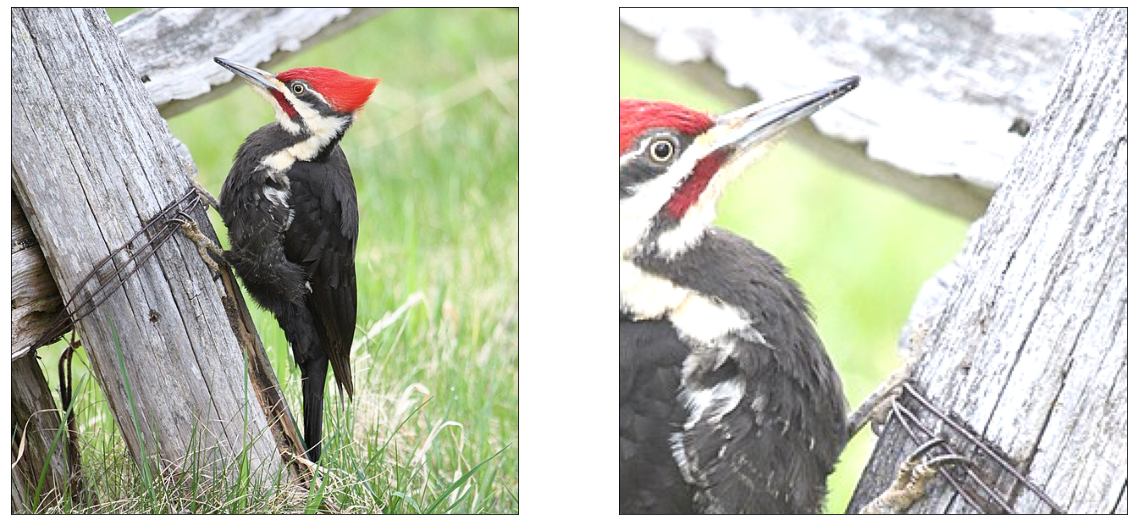

In [45]:
show([image, transformed_image])